# 1.Introduction
Access to healthcare is a fundamental human right, yet significant disparities remain, particularly regarding health insurance coverage. Health insurance plays a crucial role in ensuring individuals can afford and access necessary medical services without facing catastrophic financial burdens. Despite its importance, many individuals remain uninsured, often due to socioeconomic barriers such as employment status and income levels. This analysis aims to explore the patterns of health insurance coverage, the influence of socioeconomic factors on insurance access, and how insurance status affects healthcare utilization, particularly hospital visits. By analyzing these dynamics, we can provide meaningful insights to inform stakeholders in developing strategies to improve health insurance penetration and promote healthcare equity.

#### Problem Statement
The project focuses on addressing critical questions regarding healthcare access through insurance, specifically:

Key Metrics Tracked:

Percentage of individuals with health insurance.

Influence of employment and income on insurance access.

Hospital visit frequency differences between insured and uninsured individuals.

#### Objectives:
The goal of this project is to deeply analyze the factors influencing health insurance coverage and hospital visit behaviors among different socioeconomic groups. Specifically, the project aims to:

1.Measure the proportion of individuals with and without health insurance.

2.Explore how employment status and household income impact access to insurance.

3.Compare hospital visit patterns between insured and uninsured individuals.

Provide actionable insights to healthcare policymakers and stakeholders to design targeted interventions that improve healthcare access and equity.

#### Scope of Work
This project will involve:

Cleaning and preprocessing the healthcare survey dataset.

Exploratory Data Analysis (EDA) to understand patterns and trends.

Visualizing key metrics for easy stakeholder interpretation.

Conducting statistical analysis to uncover significant relationships between socioeconomic factors and insurance status.

Summarizing key findings and providing data-driven recommendations.



In [119]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind
import warnings
import matplotlib.ticker as mtick
warnings.filterwarnings('ignore')

# 2. Data Loading Cleaning and preprocessing

In [120]:
#Step 1: Load the dataset 
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\SELF IMPROVEMENT CONTENT\PYTHON\Healthcare Dataset.csv")
print(df.head())

                                        Location  _Location_latitude  \
0   -0.2742007 36.058336 1882.2000732421875 20.0           -0.274201   
1  -0.7158125 37.1475058 1361.9000244140625 20.0           -0.715812   
2  -0.7158157 37.1475082 1361.9000244140625 20.0           -0.715816   
3    -0.7157082 37.14749 1361.9000244140625 20.0           -0.715708   
4  -0.7157337 37.1474799 1361.9000244140625 20.0           -0.715734   

   _Location_longitude  _Location_altitude  _Location_precision Date and Time  \
0            36.058336         1882.200073                 20.0           NaN   
1            37.147506         1361.900024                 20.0    2023-05-15   
2            37.147508         1361.900024                 20.0    2023-05-15   
3            37.147490         1361.900024                 20.0    2023-05-15   
4            37.147480         1361.900024                 20.0    2023-05-15   

     Age  Gender Marital Status  How many children do you have, if any?  ...  \


In [121]:
#Step 2: Select only the colums relevant to our analysis
# Select only relevant columns for your analysis
relevant_columns = [
    'Have you ever had health insurance?',
    'Employment Status',
    'Monthly Household Income',
    'Did you have health insurance during your last hospital visit?',
    'When was the last time you visited a hospital for medical treatment? (In Months)',
    'Age',
    'Gender',
    'Marital Status',
    'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?'
]

# 2. Select the relevant columns from the DataFrame
health_data = df[relevant_columns]

# 3. Preview the selected dataset
health_data

,Have you ever had health insurance?,Employment Status,Monthly Household Income,Did you have health insurance during your last hospital visit?,When was the last time you visited a hospital for medical treatment? (In Months),Age,Gender,Marital Status,"Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?"
0,Yes,Self-employed,20001-30000,No,53.0,41-50,Female,Married,No
1,No,Unemployed,Less than 10000,No,8.0,18-30,Male,Single,No
2,No,Self-employed,20001-30000,Yes,6.0,41-50,Female,Married,Yes
3,Yes,Self-employed,10001-20000,Yes,16.0,18-30,Male,Single,No
4,Yes,Self-employed,20001-30000,Yes,13.0,41-50,Male,Married,Yes
...,...,...,...,...,...,...,...,...,...
6153,Yes,Self-employed,Less than 10000,Yes,3.0,18-30,Female,Single,No
6154,Yes,Self-employed,40001-50000,Yes,3.0,41-50,Male,Married,Yes
6155,Yes,Employed,10001-20000,Yes,6.0,31-40,Female,Married,Yes
6156,Yes,Self-employed,Less than 10000,Yes,5.0,31-40,Male,Divorced,Yes


In [122]:
#Step 4: Check the number of missing values in each column
missing_values = health_data.isnull().sum()

# Display missing values as counts and percentages
missing_percentage = (health_data.isnull().mean() * 100).round(2)

# Combine counts and percentages into one table
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percentage
})

print(missing_summary)

                                                    Missing Count  Missing %
Have you ever had health insurance?                            19       0.31
Employment Status                                              24       0.39
Monthly Household Income                                      259       4.21
Did you have health insurance during your last ...             56       0.91
When was the last time you visited a hospital f...            158       2.57
Age                                                            18       0.29
Gender                                                         17       0.28
Marital Status                                                 18       0.29
Have you ever had a cancer screening (e.g. mamm...             31       0.50


In [123]:
# Data Cleaning
# Step 1: Define categorical columns with missing values
categorical_columns = [
    'Have you ever had health insurance?',
    'Employment Status',
    'Did you have health insurance during your last hospital visit?',
    'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?',
    'Gender',
    'Marital Status'
]

# Step 2: Replace missing values in categorical columns with the mode
for col in categorical_columns:
    if col in health_data.columns:
        health_data[col] = health_data[col].fillna(health_data[col].mode()[0])
    else:
        print(f"Warning: Column '{col}' not found in DataFrame")
        
        
age_mode = df['Age'].mode()[0]
health_data['Age'] = health_data['Age'].fillna(age_mode)

# Step 3: Handle missing values in numeric columns

# Replace missing 'Monthly Household Income' with 0
if 'Monthly Household Income' in health_data.columns:
    health_data['Monthly Household Income'] = health_data['Monthly Household Income'].fillna(0)

# Replace missing values in hospital visit column with the mean
visit_col = 'When was the last time you visited a hospital for medical treatment? (In Months)'
if visit_col in health_data.columns:
    health_data[visit_col] = health_data[visit_col].fillna(health_data[visit_col].mean())


# Step 4: Final check for missing values
missing_values = health_data.isnull().sum()
missing_percentage = (health_data.isnull().mean() * 100).round(2)

# Combine counts and percentages into one table
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percentage
})

# Display the summary of missing values
print("Missing values summary after imputation:\n", missing_summary)

# Preview the cleaned dataset
print("\nPreview of the cleaned data:\n", health_data.head())

Missing values summary after imputation:
                                                     Missing Count  Missing %
Have you ever had health insurance?                             0        0.0
Employment Status                                               0        0.0
Monthly Household Income                                        0        0.0
Did you have health insurance during your last ...              0        0.0
When was the last time you visited a hospital f...              0        0.0
Age                                                             0        0.0
Gender                                                          0        0.0
Marital Status                                                  0        0.0
Have you ever had a cancer screening (e.g. mamm...              0        0.0

Preview of the cleaned data:
   Have you ever had health insurance? Employment Status  \
0                                 Yes     Self-employed   
1                                  No  

Since the 'Age' column contains categorical ranges, identifying the mode directly can be challenging. Therefore, we first determine the most frequent age range (mode) and then use it to fill the missing values.

In [124]:
health_data.shape

(6158, 9)

# 3. Exploratory Data Analysis (EDA)

In [125]:
health_data.dtypes

Have you ever had health insurance?                                                  object
Employment Status                                                                    object
Monthly Household Income                                                             object
Did you have health insurance during your last hospital visit?                       object
When was the last time you visited a hospital for medical treatment? (In Months)    float64
Age                                                                                  object
Gender                                                                               object
Marital Status                                                                       object
Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?            object
dtype: object

In [126]:
#Data types of columns: 
#print(health_data.shape)
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6158 entries, 0 to 6157
Data columns (total 9 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Have you ever had health insurance?                                               6158 non-null   object 
 1   Employment Status                                                                 6158 non-null   object 
 2   Monthly Household Income                                                          6158 non-null   object 
 3   Did you have health insurance during your last hospital visit?                    6158 non-null   object 
 4   When was the last time you visited a hospital for medical treatment? (In Months)  6158 non-null   float64
 5   Age                                                                               6158 non-null   object 
 6   G

In [128]:
# Renaming Columns that are too long

# Clean Health Insurance and cancer screening (Yes/No)
health_data['has_insurance'] = df['Have you ever had health insurance?'].map({'Yes': 1, 'No': 0})
health_data['has_undergone_cancer_screening'] = df['Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?'].map({'Yes': 1, 'No': 0})
health_data.head()

,Have you ever had health insurance?,Employment Status,Monthly Household Income,Did you have health insurance during your last hospital visit?,When was the last time you visited a hospital for medical treatment? (In Months),Age,Gender,Marital Status,"Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?",has_insurance,has_undergone_cancer_screening
0,Yes,Self-employed,20001-30000,No,53.0,41-50,Female,Married,No,1.0,0.0
1,No,Unemployed,Less than 10000,No,8.0,18-30,Male,Single,No,0.0,0.0
2,No,Self-employed,20001-30000,Yes,6.0,41-50,Female,Married,Yes,0.0,1.0
3,Yes,Self-employed,10001-20000,Yes,16.0,18-30,Male,Single,No,1.0,0.0
4,Yes,Self-employed,20001-30000,Yes,13.0,41-50,Male,Married,Yes,1.0,1.0


# 4. Data Analysis & Visualzation

#### 1. Percentage of Individuals with Insurance

In [102]:
insurance_rate = health_data['has_insurance'].mean() * 100
print(f"Percentage of individuals with health insurance: {insurance_rate:.2f}%")


Percentage of individuals with health insurance: 57.96%


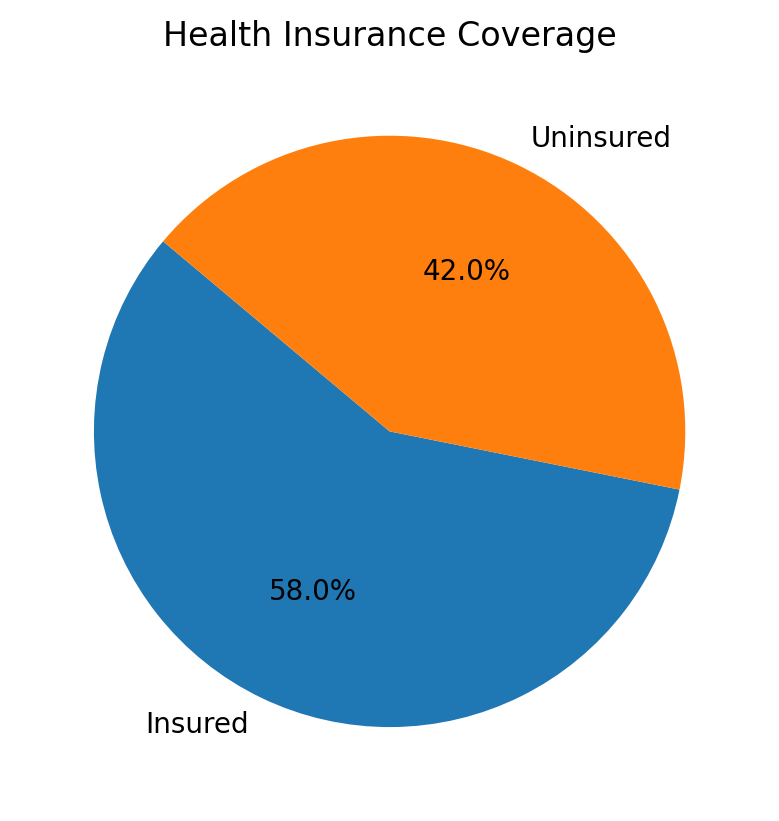

In [129]:
#Insurance coverage pie chart
health_data['has_insurance'].replace({1: 'Insured', 0: 'Uninsured'}).value_counts().plot(
    kind='pie', autopct='%1.1f%%',startangle=140)
plt.title('Health Insurance Coverage')
plt.ylabel('')
plt.show()

#### 2. Influence income levels on insurance access.

In [130]:
# Split data based on insurance status
health_data['income'] = health_data['Monthly Household Income']
income_insured = health_data[health_data['has_insurance'] == 1]['income'].dropna()
income_uninsured = health_data[health_data['has_insurance'] == 0]['income'].dropna()

In [131]:
# Approximate Monthly Household Income (convert categories to numeric midpoints)
income_mapping = {
    'Less than 10000': 5000,
    '10001-20000': 15000,
    '20001-30000': 25000,
    '30001-40000': 35000,
    '40001-50000': 45000,
    'More than 50000': 60000
}

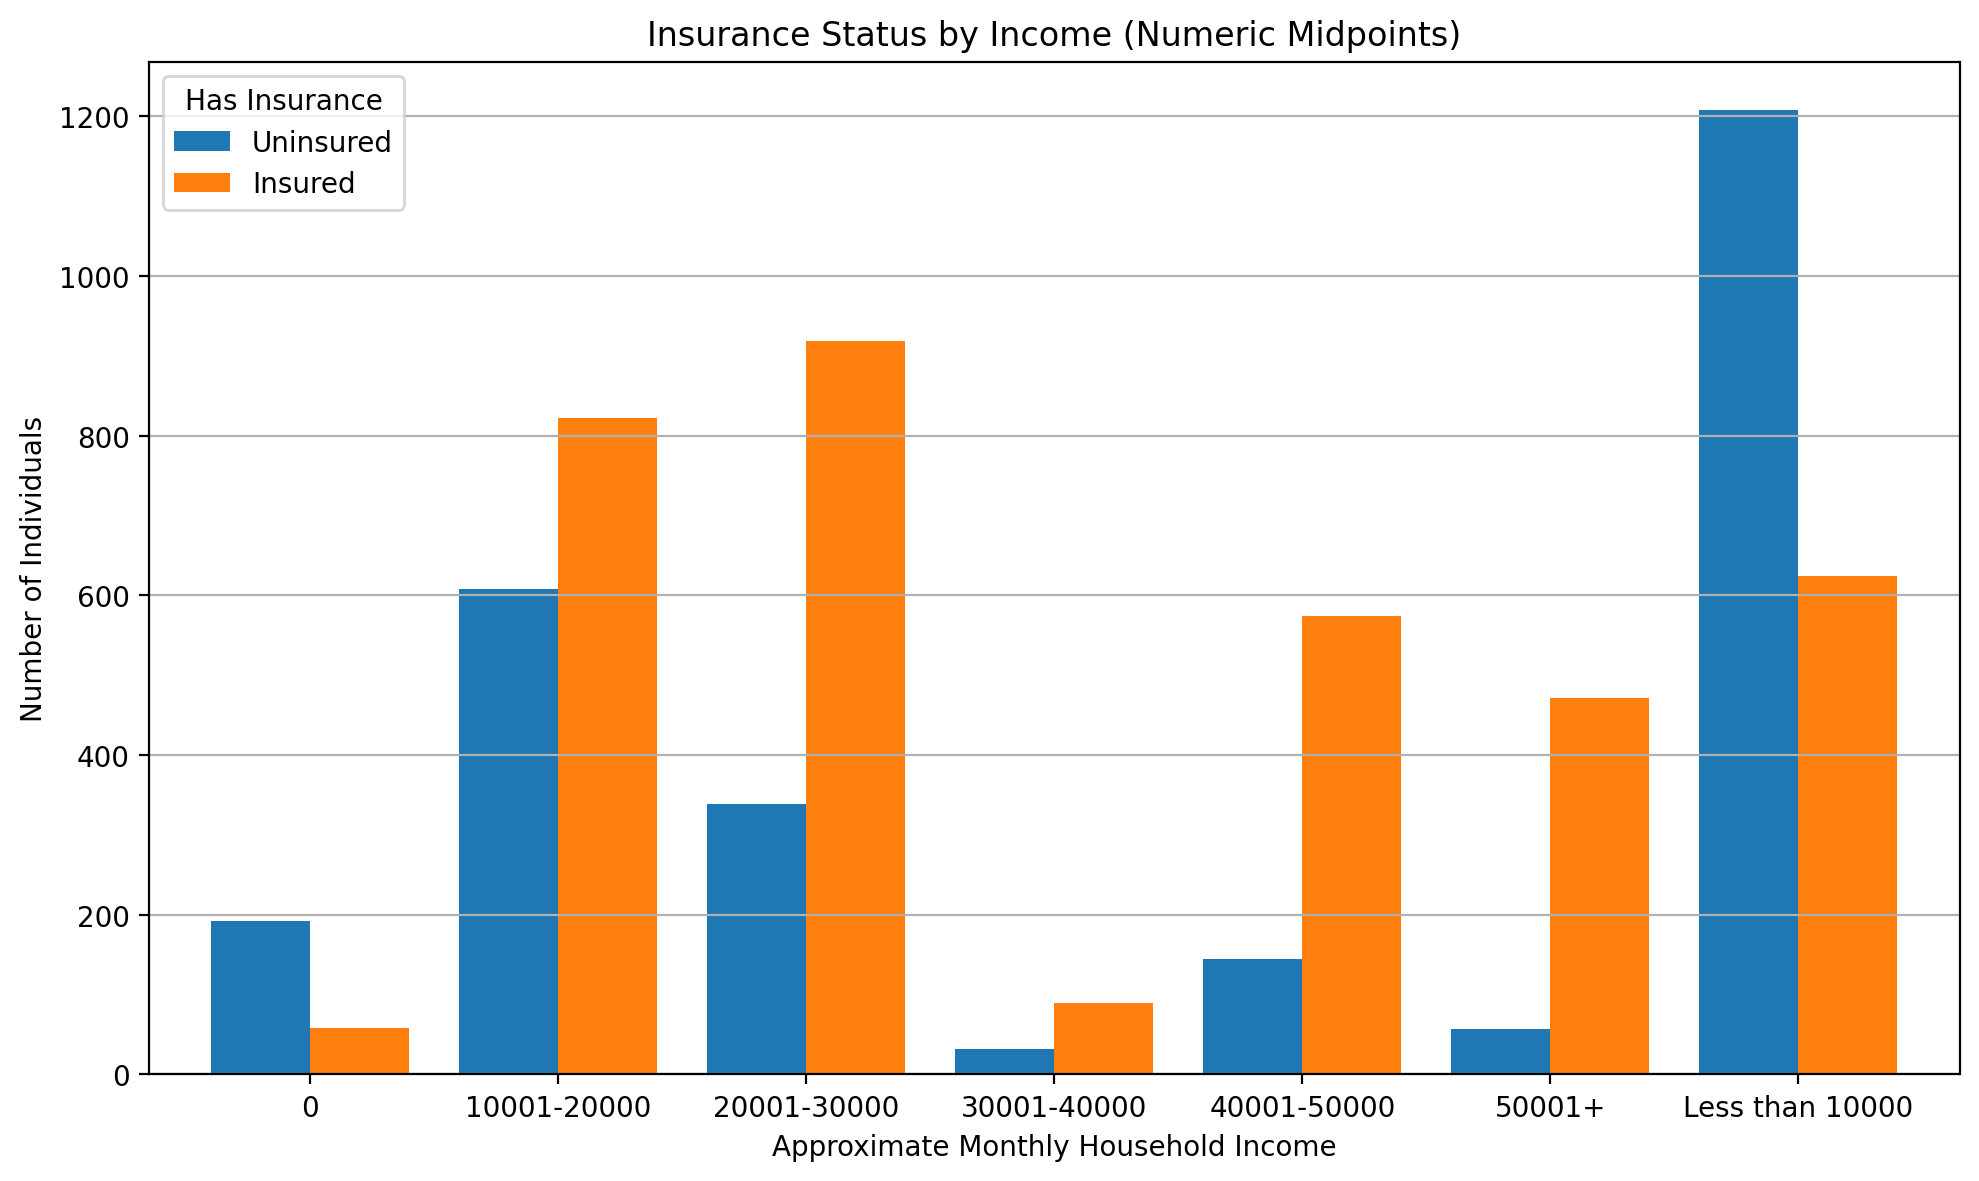

In [106]:
# Group by numeric income and insurance status
income_counts = health_data.groupby(['income', 'has_insurance']).size().unstack(fill_value=0)

# Plot side-by-side bar chart
income_counts.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Insurance Status by Income (Numeric Midpoints)')
plt.xlabel('Approximate Monthly Household Income')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(['Uninsured', 'Insured'], title='Has Insurance')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 3. Influence of Employment levels on insurance access.

In [132]:
# Cross-tabulation of employment status
employment_crosstab = pd.crosstab(health_data['Employment Status'], health_data['has_insurance'], normalize='index') *1000


print("\nInsurance coverage by Employment Status:")
print(employment_crosstab)



Insurance coverage by Employment Status:
has_insurance             0.0         1.0
Employment Status                        
Employed           214.513921  785.486079
Self-employed      387.888707  612.111293
Unemployed         661.938534  338.061466


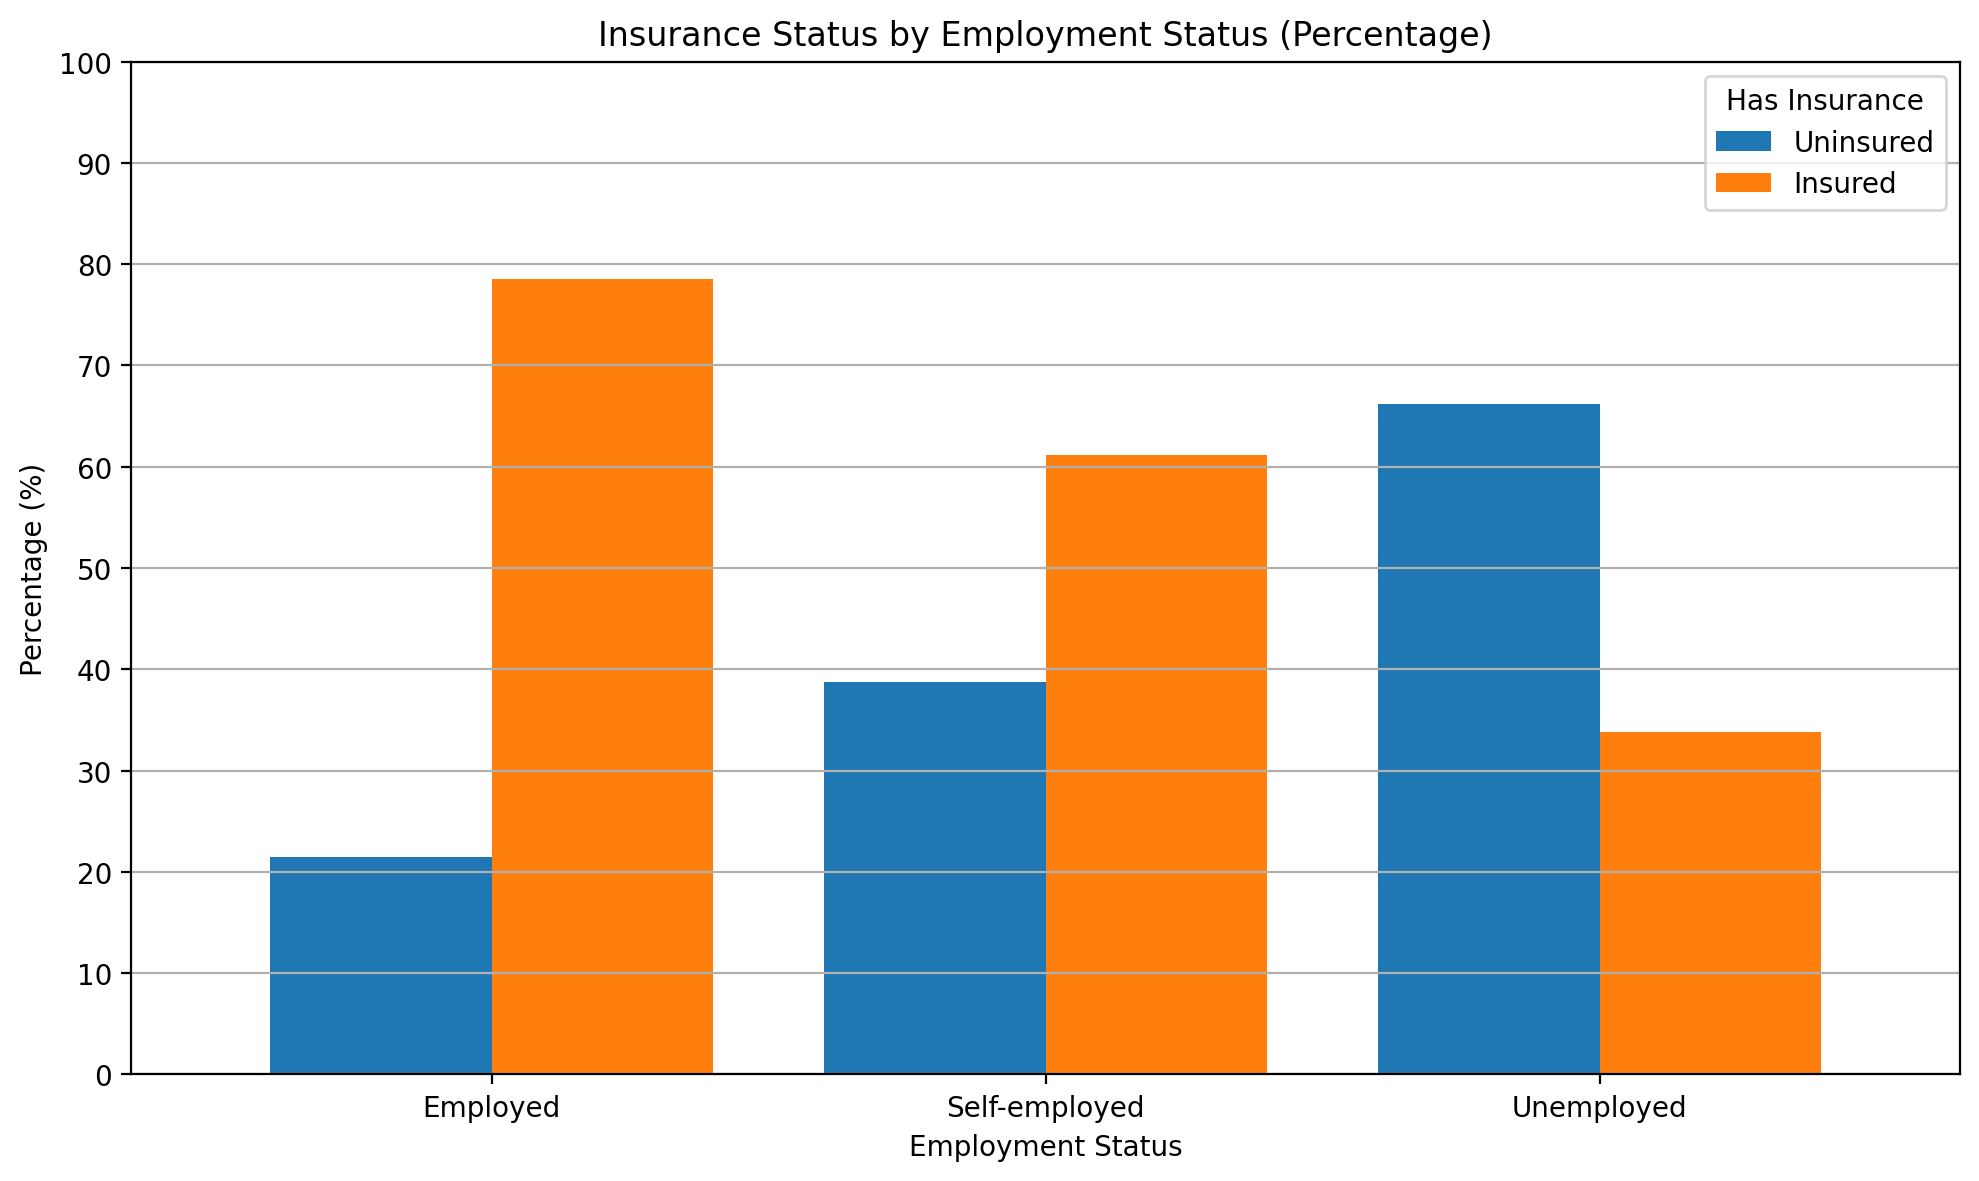

In [134]:
# Clean column names
health_data.columns = health_data.columns.str.strip()

# Group and count
counts = health_data.groupby(['Employment Status', 'has_insurance']).size().unstack(fill_value=0)

# Convert to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot
ax = percentages.plot(kind='bar', figsize=(10, 6), width=0.8)

# Y-axis as percentages
ax.set_ylabel('Percentage (%)')
ax.set_yticks(range(0, 101, 10))  # 0% to 100% in steps of 10

# Final touches
plt.title('Insurance Status by Employment Status (Percentage)')
plt.xlabel('Employment Status')
plt.xticks(rotation=0)
plt.legend(['Uninsured', 'Insured'], title='Has Insurance')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Insights

The employes have a significantly higher  rate of insurance coverage than the unemployed and self employed.

### 4. Assess the impact of health insurance on hospital visit frequency.

In [135]:
# Hospital Visits - recency in months
health_data['hospital_visit_months_ago'] = pd.to_numeric(health_data['When was the last time you visited a hospital for medical treatment? (In Months)'], errors='coerce')


In [136]:
# Split data based on insurance status and drop missing values
insured_visits = health_data[health_data['has_insurance'] == 1]['hospital_visit_months_ago'].dropna()
uninsured_visits = health_data[health_data['has_insurance'] == 0]['hospital_visit_months_ago'].dropna()

# Print average months since last hospital visit for insured vs. uninsured
print(f"\nAverage months since last hospital visit (insured): {insured_visits.mean():.2f}")
print(f"Average months since last hospital visit (uninsured): {uninsured_visits.mean():.2f}")



Average months since last hospital visit (insured): 5.54
Average months since last hospital visit (uninsured): 8.19


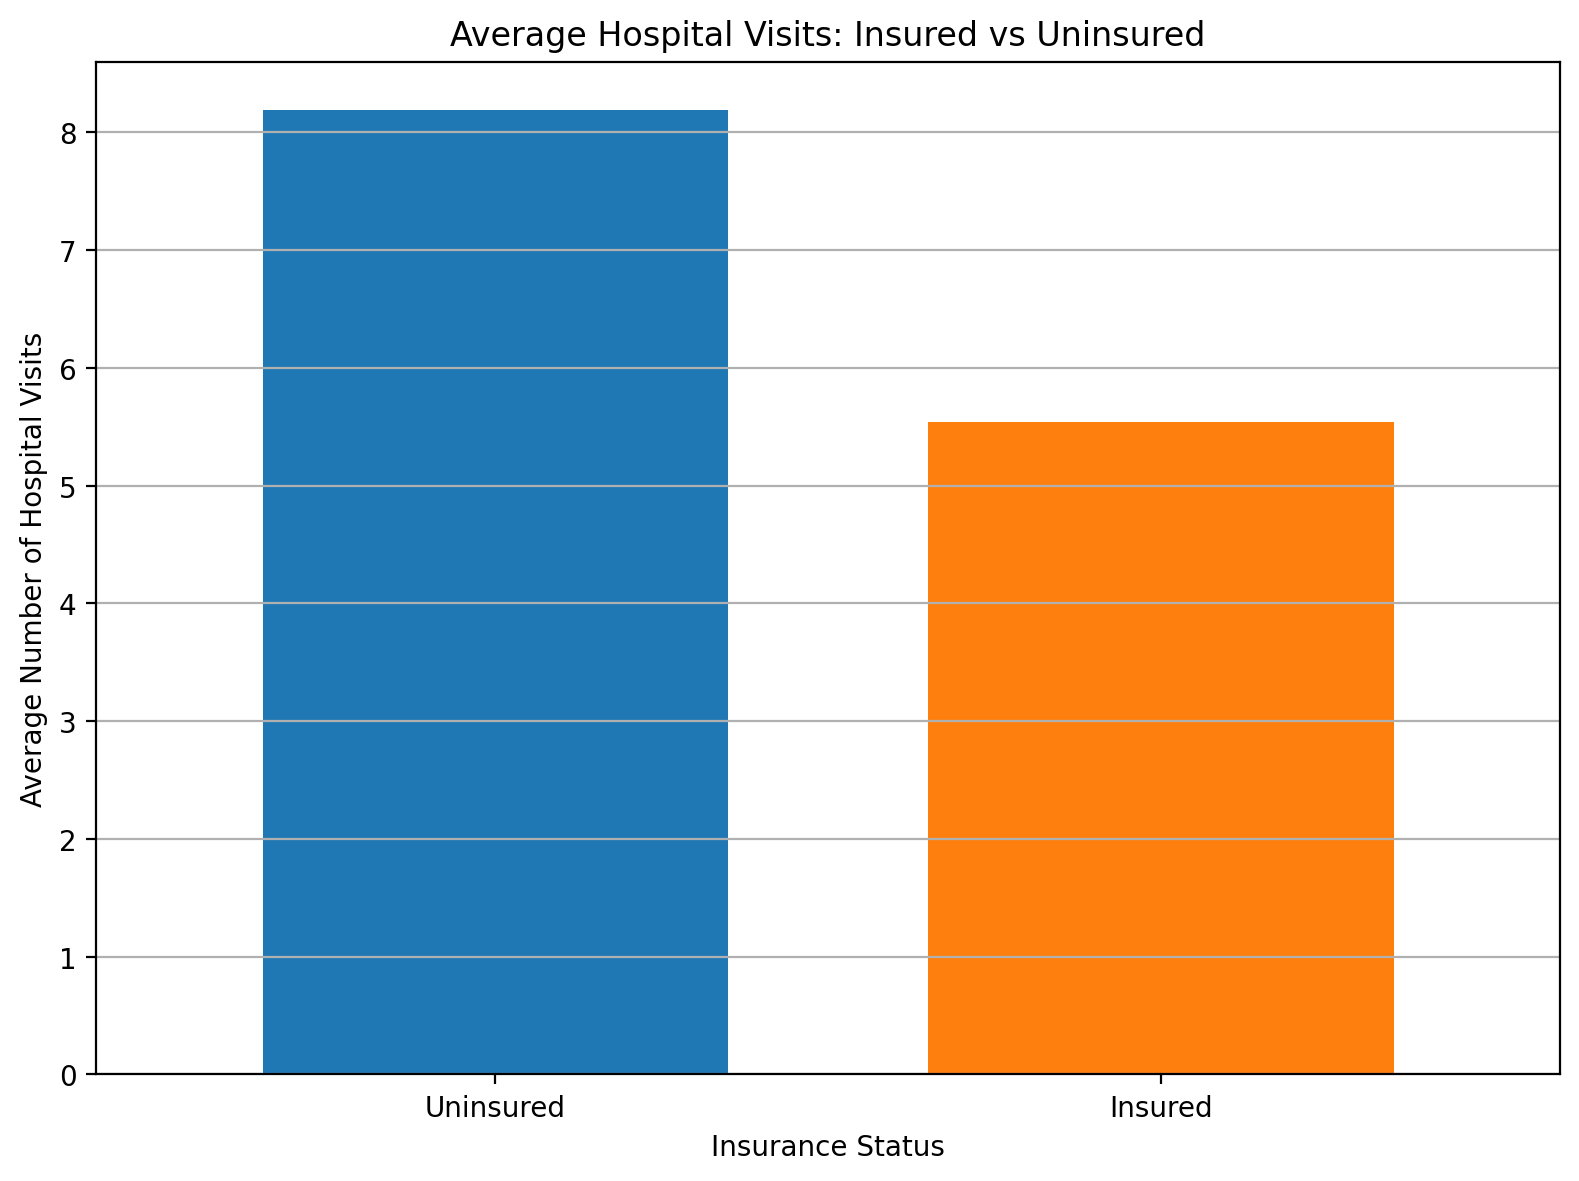

In [137]:
import matplotlib.pyplot as plt

# Group by insurance status and calculate the average number of hospital visits
avg_hospital_visits_by_insurance = health_data.groupby('has_insurance')['hospital_visit_months_ago'].mean()

# Plot bar chart with customized colors
plt.figure(figsize=(8, 6))
avg_hospital_visits_by_insurance.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], width=0.7)

# Customize the plot
plt.title('Average Hospital Visits: Insured vs Uninsured')
plt.xlabel('Insurance Status')
plt.ylabel('Average Number of Hospital Visits')
plt.xticks([0, 1], ['Uninsured', 'Insured'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()



### 5. Check the age and gender with frequency of hospital visits


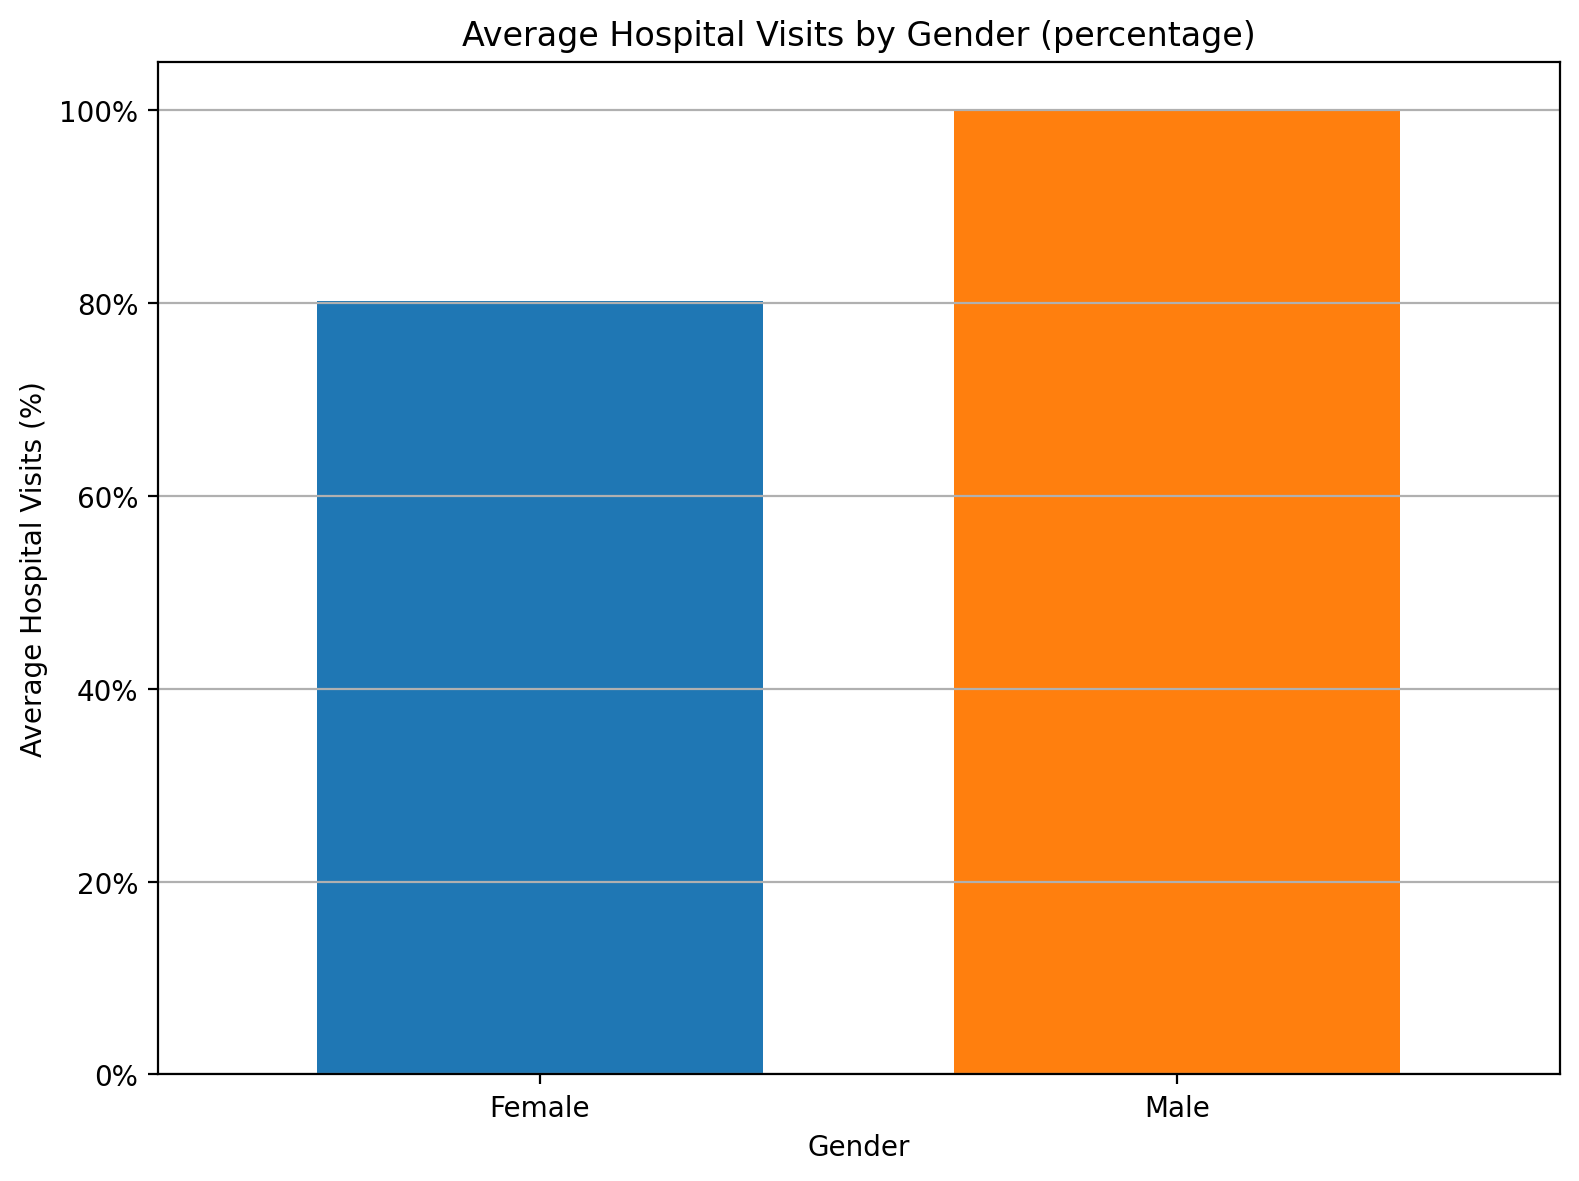

In [138]:
# Group by Gender and calculate the average number of hospital visits
avg_hospital_visits_by_gender = health_data.groupby('Gender')['hospital_visit_months_ago'].mean()

# Normalize the values to percentage scale (0–100%)
max_val = avg_hospital_visits_by_gender.max()
avg_hospital_visits_percentage = (avg_hospital_visits_by_gender / max_val) * 100

# Plot bar chart with customized colors
plt.figure(figsize=(8, 6))
avg_hospital_visits_percentage.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], width=0.7)

# Customize the plot
plt.title('Average Hospital Visits by Gender (percentage)')
plt.xlabel('Gender')
plt.ylabel('Average Hospital Visits (%)')

# Set x-tick labels using the index
plt.xticks(ticks=range(len(avg_hospital_visits_percentage)),
           labels=avg_hospital_visits_percentage.index,
           rotation=0)

# Format y-axis to show percentage signs
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()


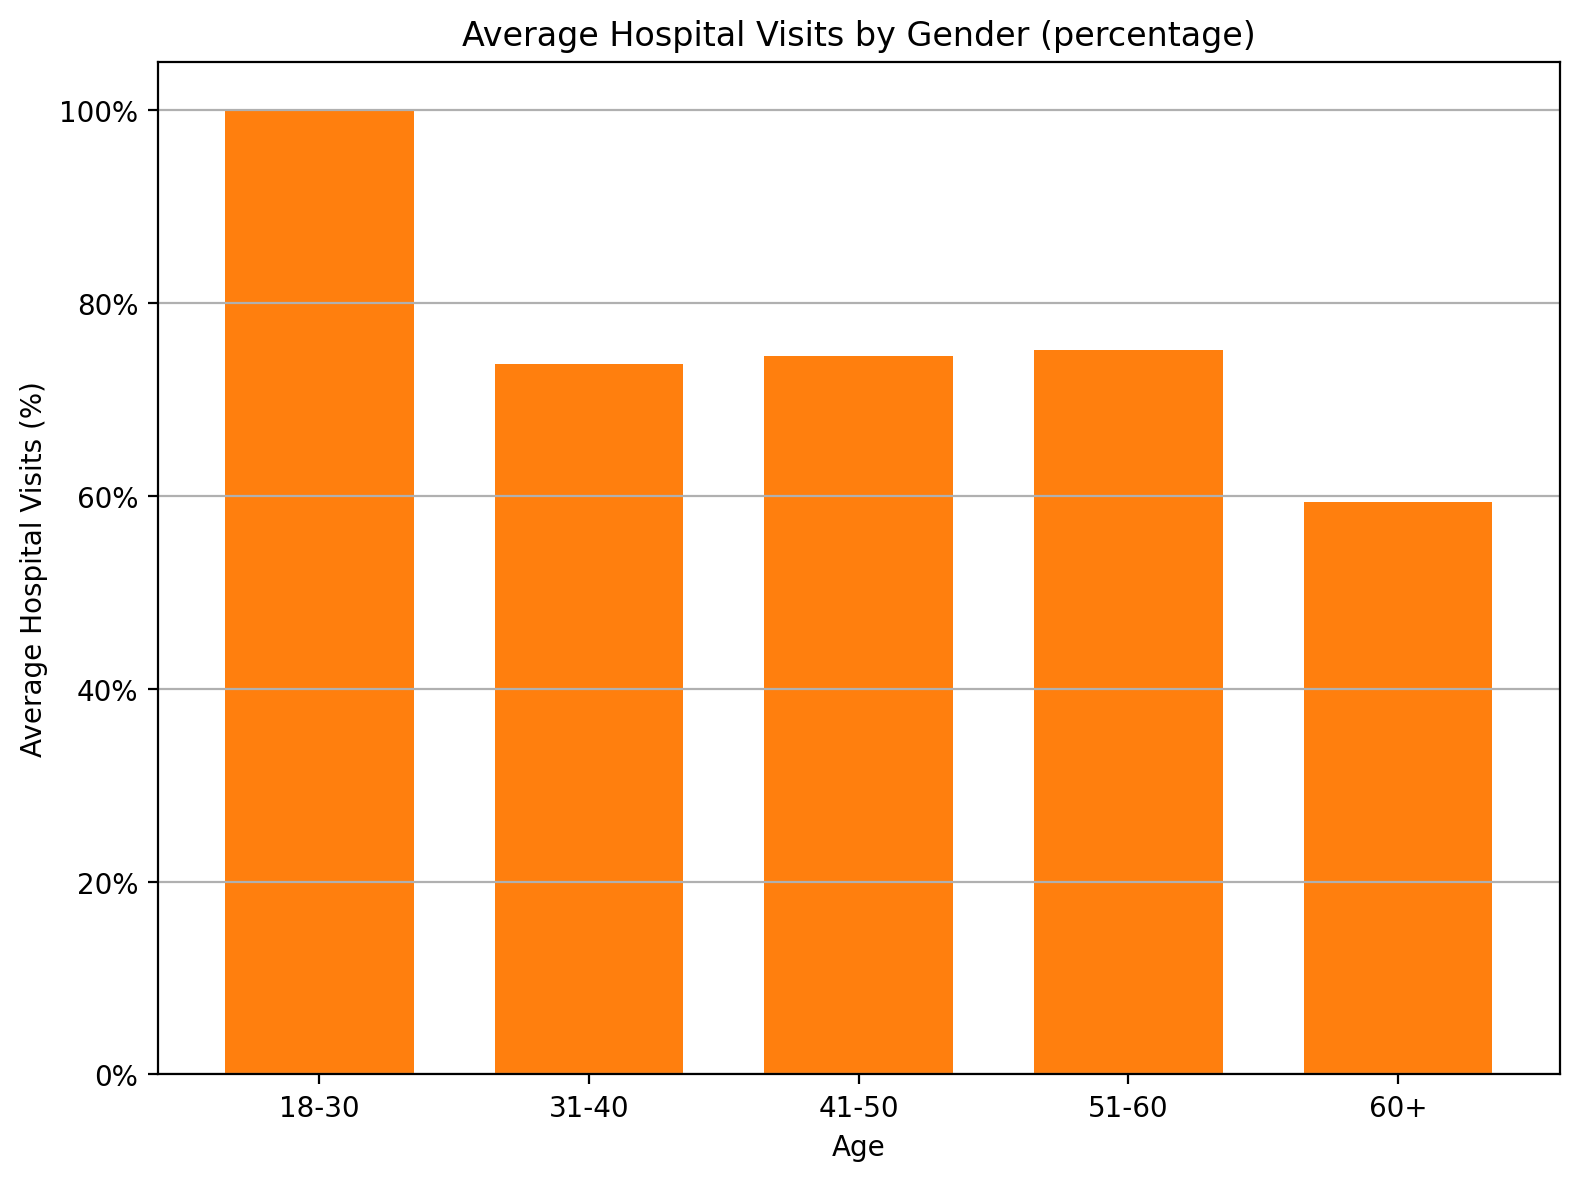

In [140]:
# Group by Gender and calculate the average number of hospital visits
avg_hospital_visits_by_gender = health_data.groupby('Age')['hospital_visit_months_ago'].mean()

# Normalize the values to percentage scale (0–100%)
max_val = avg_hospital_visits_by_gender.max()
avg_hospital_visits_percentage = (avg_hospital_visits_by_gender / max_val) * 100

# Plot bar chart with customized colors
plt.figure(figsize=(8, 6))
avg_hospital_visits_percentage.plot(kind='bar', color=['#ff7f0e'], width=0.7)

# Customize the plot
plt.title('Average Hospital Visits by Gender (percentage)')
plt.xlabel('Age')
plt.ylabel('Average Hospital Visits (%)')

# Set x-tick labels using the index
plt.xticks(ticks=range(len(avg_hospital_visits_percentage)),
           labels=avg_hospital_visits_percentage.index,
           rotation=0)

# Format y-axis to show percentage signs
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()


### 6. Age and gender hat have undergone cancer  Screening

<Figure size 1200x600 with 0 Axes>

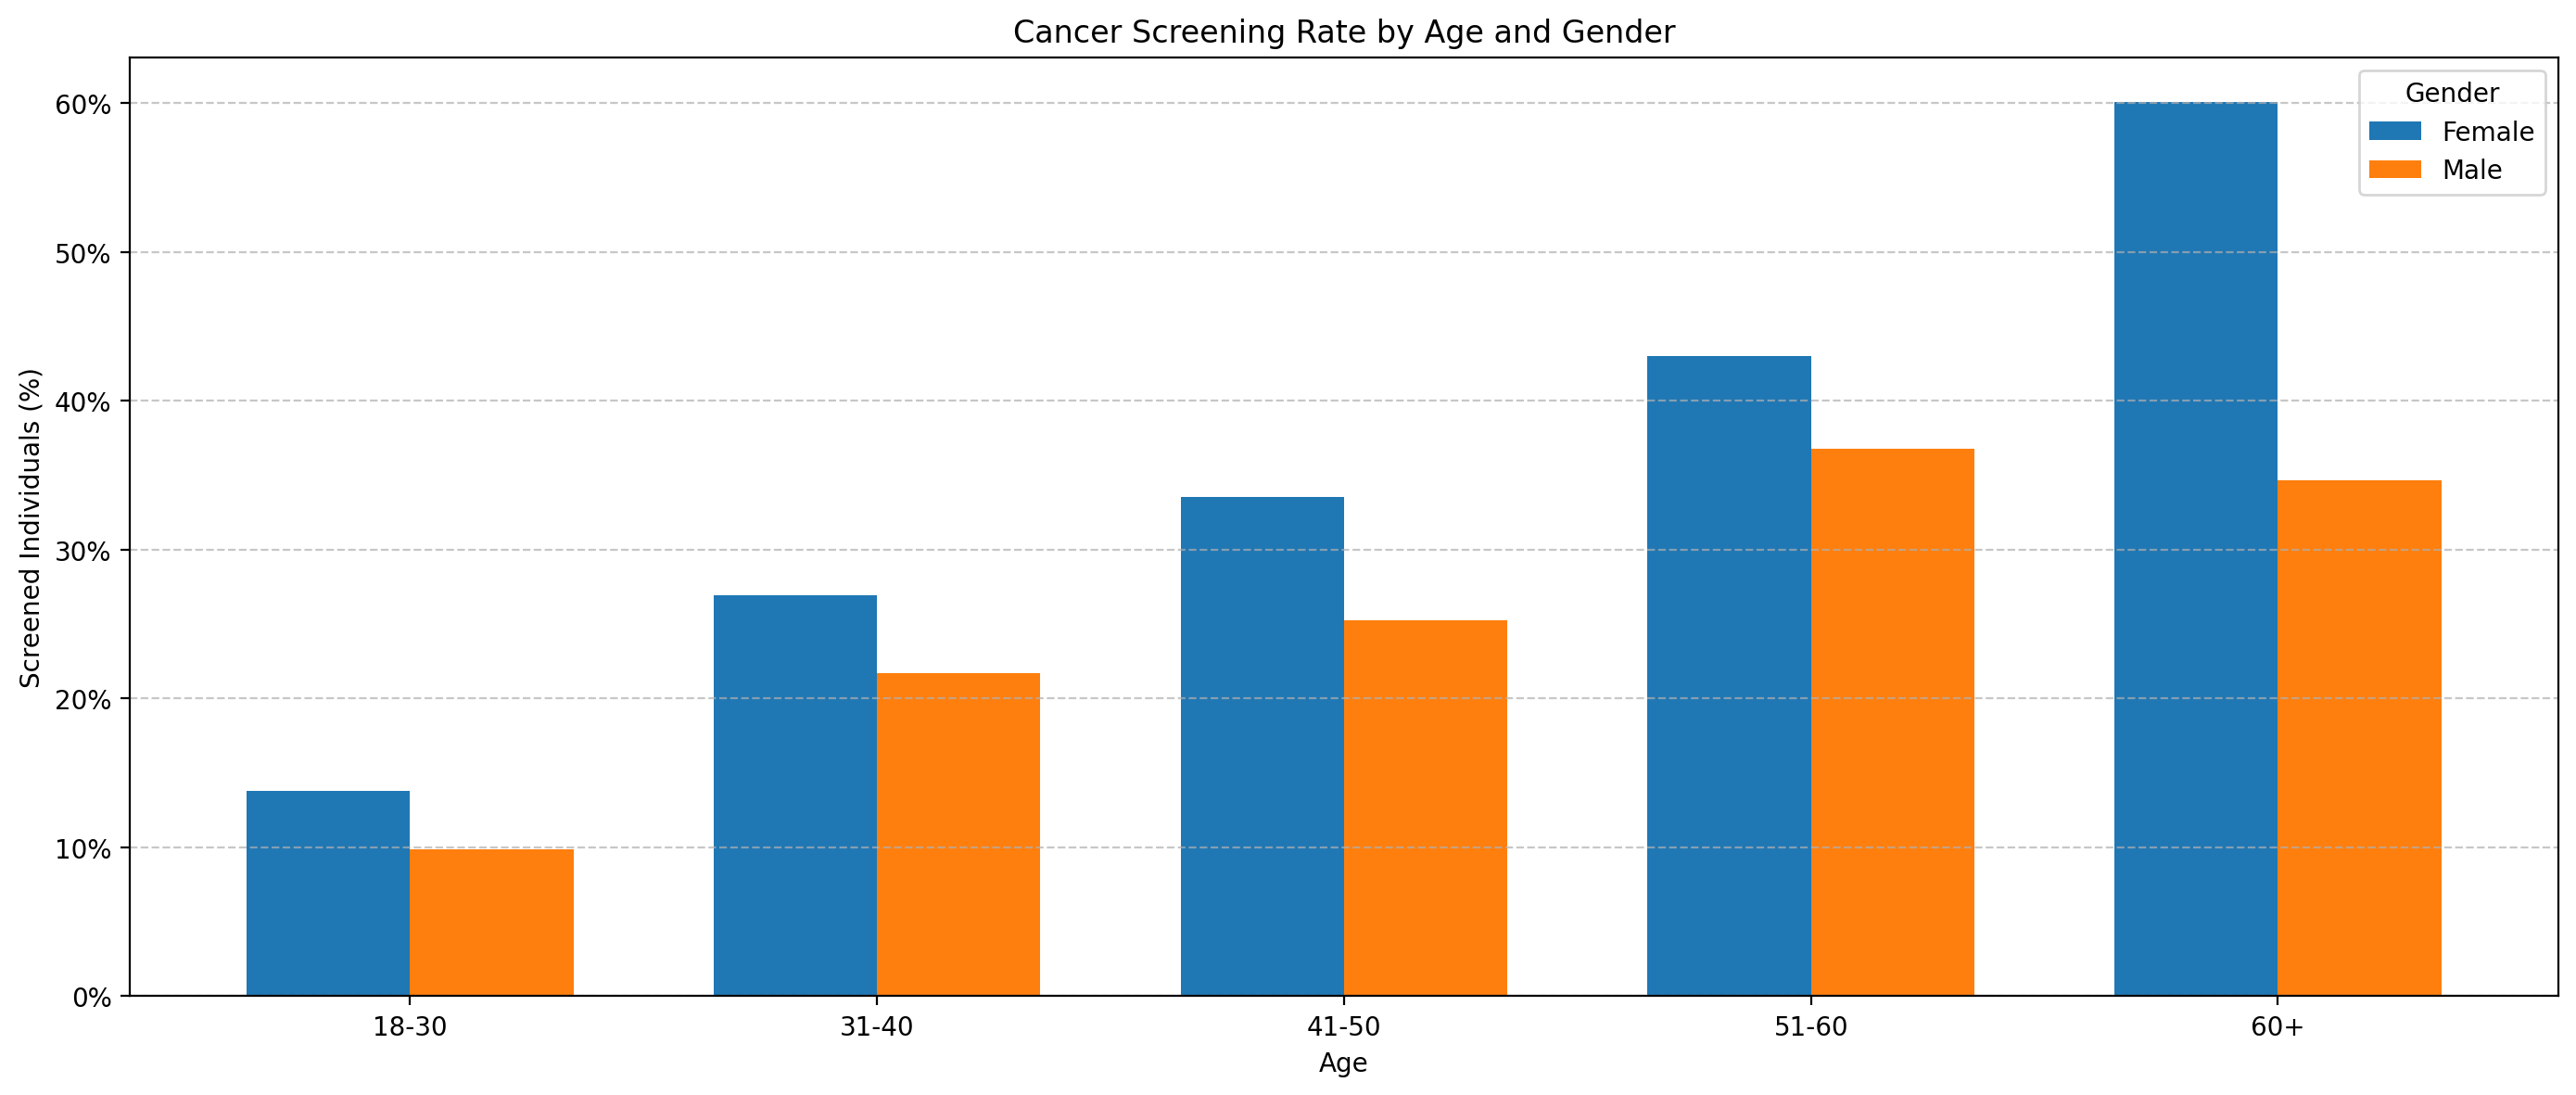

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Group by both Age and Gender, then calculate mean (%) of cancer screening
grouped = (
    health_data.groupby(['Age', 'Gender'])['has_undergone_cancer_screening']
    .mean()
    .unstack() * 100
)

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', width=0.7, figsize=(14, 6), color=['#1f77b4', '#ff7f0e'])

# Customize the plot
plt.title('Cancer Screening Rate by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Screened Individuals (%)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()



#### 7. Marital status against insured and uninsured

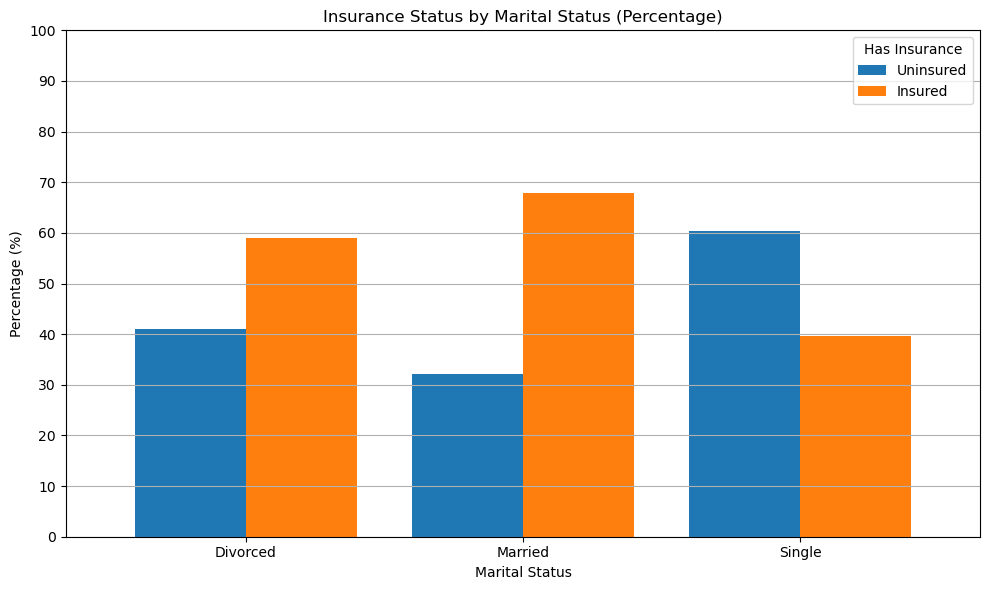

In [282]:
# Clean column names
health_data.columns = health_data.columns.str.strip()

# Group and count
counts = health_data.groupby(['Marital Status', 'has_insurance']).size().unstack(fill_value=0)

# Convert to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot
ax = percentages.plot(kind='bar', figsize=(10, 6), width=0.8)

# Y-axis as percentages
ax.set_ylabel('Percentage (%)')
ax.set_yticks(range(0, 101, 10))  # 0% to 100% in steps of 10

# Final touches
plt.title('Insurance Status by Marital Status (Percentage)')
plt.xlabel('Marital Status')
plt.xticks(rotation=0)
plt.legend(['Uninsured', 'Insured'], title='Has Insurance')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Assumptions
1. Data Limitations:
o The dataset may not represent the entire population, potentially skewing results.
2. Self-Reported Bias:
o Variables like income and hospital visits are self-reported and may contain
inaccuracies.
3. Temporal Context:
o The analysis reflects a specific period and may not capture ongoing trends.
4. Unmeasured Variables:
o Factors like regional healthcare policies and cultural differences were not accounted
for.


#### Insights
1. Percentage of individuals with health insurance: 57.96% of the individuals are insured which is a sightly higher number  than those not insured.
2. Influence income levels on insurance acces;Higher income groups have a higher proportion of insured individuals, while lower-income groups are mostly uninsured. Insurance coverage clearly increases with income level.
3. Influence of Employment levels on insurance access: Employed individuals have the highest insurance coverage (nearly 80%). Unemployed individuals are mostly uninsured (about 66%), showing a clear link between employment and insurance access.
4. Assess the impact of health insurance on hospital visit frequency; Uninsured people visit hospitals more often than the insured, likely due to lack of access to preventive care, leading to more emergency or severe cases.

Other areas analysed were;

5. The age and gender with frequency of hospital visits; More females visited the hospitals and the hospital visits decreased with increase n age.
6. Age and gender hat have undergone cancer  Screening; More females underwent Cancer Screening and the number increased with increase in Age.
7. Marital status against insured and uninsured; Most married people and divorced had insurance while most sing people did not have.

#### Recommendations
**1. 57.96% of individuals are insured**

* Raise awareness to close the gap between insured and uninsured.
* Promote affordable insurance options to increase coverage.

**2. Income vs. Insurance Access**

* Introduce subsidized insurance plans for low-income groups.
* Educate low-income communities on the long-term benefits of insurance.

**3. Employment vs. Insurance Access**

* Encourage employer-based insurance schemes.
* Create insurance access points for the unemployed, such as community programs or government support.

**4. Insurance vs. Hospital Visit Frequency**

* Expand access to preventive care for the uninsured.
* Promote insurance enrollment to reduce emergency hospital visits.


**5. Age & Gender vs. Hospital Visits**

* Encourage older adults to maintain regular hospital visits.
* Strengthen health programs targeting younger women to sustain positive health-seeking behavior.

**6. Age & Gender vs. Cancer Screening**

* Promote early screening among younger age groups and men.
* Continue targeted awareness for older women.

**7. Marital Status vs. Insurance**

* Increase insurance awareness among single individuals.
* Partner with schools, workplaces, and youth groups to boost insurance uptake.
